<a href="https://colab.research.google.com/github/sgevatschnaider/Arte_Juegos_Matematicos/blob/main/notebooks/es/2025_numeros_octogonales_y_triangulares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

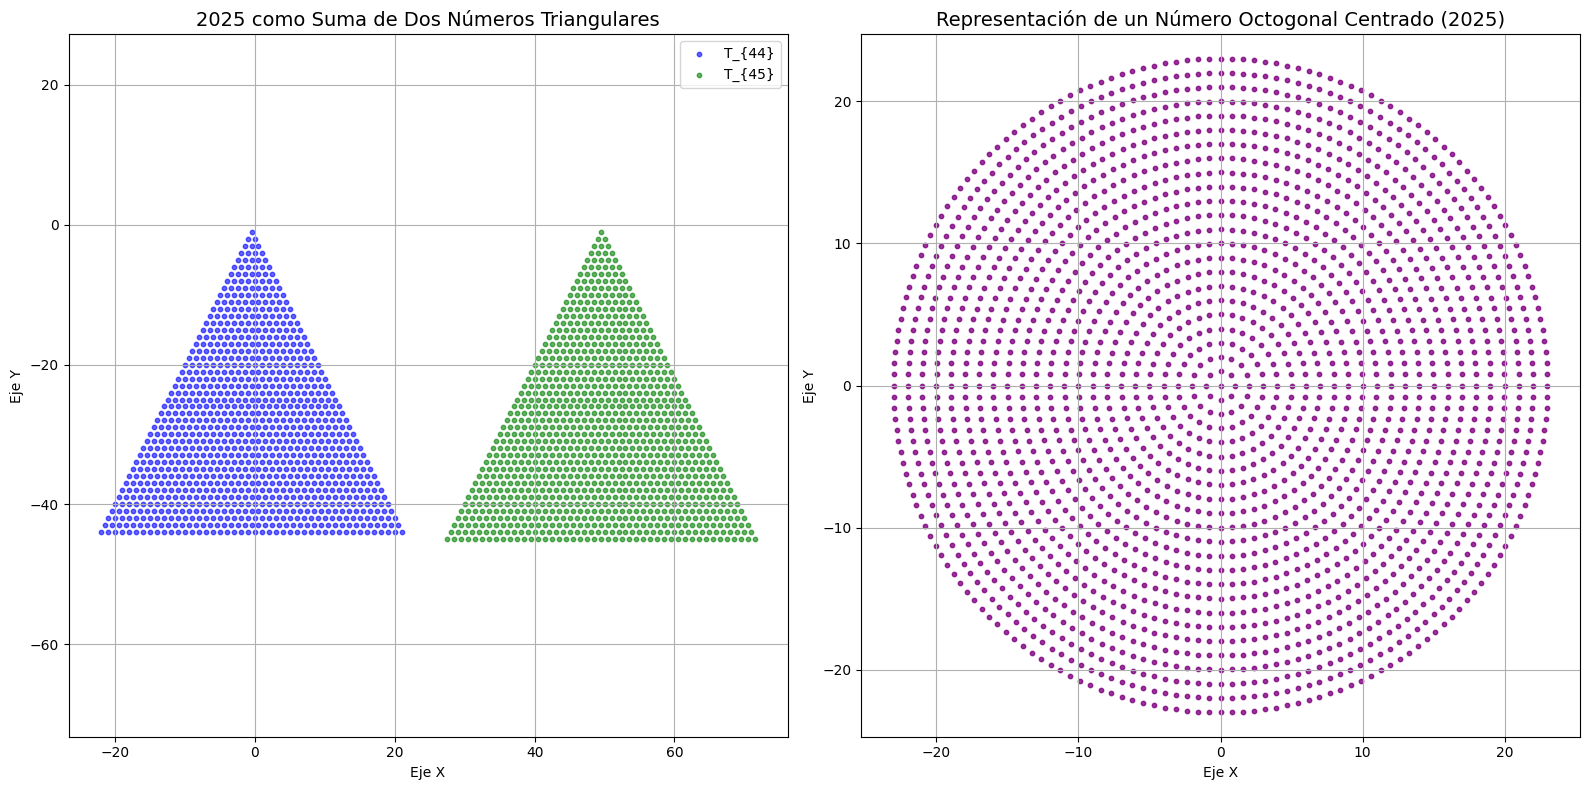

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Función para calcular el número triangular
def triangular_number(n):
    return n * (n + 1) // 2

# Coordenadas para representar un número triangular como puntos en un triángulo
def triangular_coordinates(n):
    coordinates = []
    count = 0
    for row in range(1, n + 1):
        for col in range(row):
            coordinates.append((col - row / 2, -row))  # Distribuir simétricamente
            count += 1
            if count >= triangular_number(n):
                break
    return coordinates

# Función para calcular puntos octogonales centrados
def octagonal_points(levels):
    points = [(0, 0)]  # Punto central
    for n in range(1, levels + 1):
        for i in range(8 * n):  # Generar 8n puntos por nivel
            angle = i * (2 * np.pi / (8 * n))  # Ángulo entre puntos
            x = n * np.cos(angle)
            y = n * np.sin(angle)
            points.append((x, y))
    return points

# 1. Representar números triangulares
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Coordenadas de T_44 y T_45
coords_T44 = triangular_coordinates(44)
coords_T45 = triangular_coordinates(45)

# Graficar T_44
x_T44, y_T44 = zip(*coords_T44)
ax[0].scatter(x_T44, y_T44, color='blue', label='T_{44}', alpha=0.6, s=10)

# Graficar T_45 desplazado a la derecha
x_T45, y_T45 = zip(*coords_T45)
x_T45_shifted = [x + 50 for x in x_T45]  # Desplazar para separación visual
ax[0].scatter(x_T45_shifted, y_T45, color='green', label='T_{45}', alpha=0.6, s=10)

# Etiquetas y formato del primer gráfico
ax[0].set_title('2025 como Suma de Dos Números Triangulares', fontsize=14)
ax[0].set_xlabel('Eje X')
ax[0].set_ylabel('Eje Y')
ax[0].legend()
ax[0].grid(True)
ax[0].axis('equal')

# 2. Representar el número octogonal centrado
levels = 23  # n=23 para el número octogonal centrado
oct_coords = octagonal_points(levels)

# Separar coordenadas en listas de x e y
x_oct, y_oct = zip(*oct_coords)

# Graficar puntos del número octogonal centrado
ax[1].scatter(x_oct, y_oct, color='purple', alpha=0.8, s=10)

# Etiquetas y formato del segundo gráfico
ax[1].set_title('Representación de un Número Octogonal Centrado (2025)', fontsize=14)
ax[1].set_xlabel('Eje X')
ax[1].set_ylabel('Eje Y')
ax[1].grid(True)
ax[1].axis('equal')

# Mostrar gráficos
plt.tight_layout()
plt.show()


In [ ]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML
import math

##############################################
# 1. FUNCIONES AUXILIARES
##############################################

def triangular_number(n):
    """
    Devuelve el n-ésimo número triangular: n(n+1)/2
    """
    return n * (n + 1) // 2

def triangular_coordinates(n):
    """
    Genera las coordenadas (x, y) de los puntos que forman
    la disposición de un número triangular T_n.
    """
    coords = []
    count = 0
    total = triangular_number(n)
    for row in range(1, n + 1):
        for col in range(row):
            # Ubicamos cada fila desplazada hacia el centro
            x = col - row/2
            y = -row
            coords.append((x, y))
            count += 1
            if count >= total:
                break
    return coords

def centered_octagon_coordinates(levels):
    """
    Genera las coordenadas (x, y) de un número octogonal centrado
    de orden `levels`. El n-ésimo número octogonal centrado se puede
    calcular con la fórmula (2n - 1)^2, que para n=23 da 2025.
    Se crean anillos concéntricos donde el anillo i (1..levels)
    tiene 8*i puntos.
    """
    coords = []
    coords.append((0, 0))  # Punto central (nivel 0)
    for r in range(1, levels + 1):
        # En cada anillo hay 8r puntos
        num_points_ring = 8 * r
        for i in range(num_points_ring):
            angle = 2 * np.pi * i / num_points_ring
            x = r * np.cos(angle)
            y = r * np.sin(angle)
            coords.append((x, y))
    return coords

##############################################
# 2. CÁLCULO DE LAS COORDENADAS
##############################################

# Triángulos T_44 y T_45
coords_T44 = triangular_coordinates(44)  # 990 puntos
coords_T45 = triangular_coordinates(45)  # 1035 puntos
coords_combined = coords_T44 + coords_T45  # 2025 puntos en total

# Octágono centrado de orden 23 (también 2025 puntos)
oct_coords = centered_octagon_coordinates(23)

# Asegurarnos de tener la misma longitud (deben ser 2025 puntos ambos)
assert len(coords_combined) == len(oct_coords), "Los arreglos deben tener 2025 puntos cada uno."

# Convertir a arreglos numpy para facilitar interpolación
coords_combined = np.array(coords_combined)  # (2025, 2)
oct_coords = np.array(oct_coords)           # (2025, 2)

##############################################
# 3. PARÁMETROS PARA LA ANIMACIÓN
##############################################

total_points = len(coords_combined)  # 2025
# Dividimos la animación en dos fases:
# Fase A: aparición progresiva de T_44 + T_45
# Fase B: interpolación de coords_combined -> oct_coords

frames_aparicion = 60   # cuántos frames para que "aparezcan" gradualmente (puedes ajustar)
frames_transform = 60   # cuántos frames para interpolar de triángulos -> octágono (puedes ajustar)
total_frames = frames_aparicion + frames_transform

##############################################
# 4. CONFIGURAR LA FIGURA MATPLOTLIB
##############################################

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
ax.set_aspect('equal')
ax.set_title("2025 como T_44 + T_45 y como Número Octogonal Centrado", fontsize=14)
ax.set_xlabel("Eje X")
ax.set_ylabel("Eje Y")
ax.grid(True)

# Scatter inicial (colocamos todos los puntos pero invisibles en principio)
scatter = ax.scatter([], [], c=[], s=15)

##############################################
# 5. FUNCIÓN DE ACTUALIZACIÓN (ANIMACIÓN)
##############################################

def update(frame):
    """
    En cada frame:
      - Fase A (0..frames_aparicion): Se incrementa el número de puntos visibles de coords_combined
      - Fase B (frames_aparicion..total_frames): Se hace una interpolación de todos los puntos
        desde coords_combined hacia oct_coords.
    """
    if frame < frames_aparicion:
        # Cantidad de puntos a visualizar de T_44 + T_45
        fraction = frame / (frames_aparicion - 1)  # va de 0..1
        num_pts = int(fraction * total_points)

        # Pintamos esos num_pts de "activo" y el resto, si quieres, invisible
        visible_coords = coords_combined[:num_pts]
        # Para colorear T_44 de un color y T_45 de otro, podemos hacer:
        colors = []
        for i in range(num_pts):
            if i < len(coords_T44):
                colors.append("blue")   # T_44
            else:
                colors.append("green") # T_45

        # Actualizamos scatter
        scatter.set_offsets(visible_coords)
        scatter.set_color(colors)
        scatter.set_sizes([15]*num_pts)

    else:
        # Fase B: Interpolación
        fraction = (frame - frames_aparicion) / (frames_transform - 1)
        # Interpolación lineal
        current_positions = (1 - fraction)*coords_combined + fraction*oct_coords

        # Todos los puntos están presentes, pero en posiciones intermedias
        scatter.set_offsets(current_positions)
        # Mezclamos colores si se desea, o dejamos un color nuevo (ej. "purple")
        scatter.set_color(["purple"]*total_points)
        scatter.set_sizes([15]*total_points)

    return (scatter,)

##############################################
# 6. CREAR LA ANIMACIÓN
##############################################

ani = FuncAnimation(fig, update, frames=total_frames,
                    interval=150, blit=True, repeat=True)

# Para visualizar la animación en Colab/Jupyter
HTML(anim_to_html=ani.to_jshtml())

##############################################
# 7. OPCIONAL: GUARDAR A MP4 Y/O GIF
##############################################
# Descomenta si deseas guardar a mp4 (requiere "ffmpeg" instalado en Colab):
# ani.save("anim_2025.mp4", writer='ffmpeg', fps=5)

# Descomenta si deseas guardar a GIF (requiere "pillow" instalado):
# writer_gif = PillowWriter(fps=5)
# ani.save("anim_2025.gif", writer=writer_gif)

plt.show()


AssertionError: Los arreglos deben tener 2025 puntos cada uno.

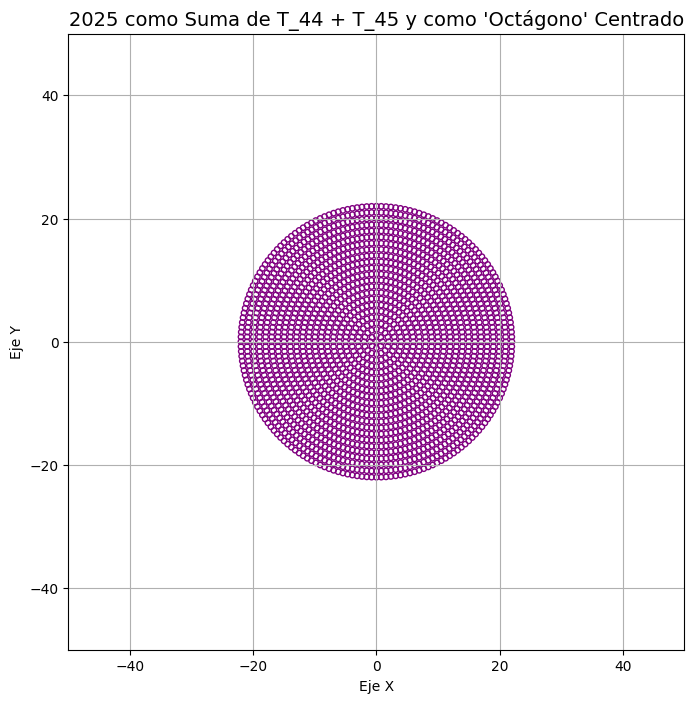

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML

##############################################
# 1. FUNCIONES AUXILIARES
##############################################

def triangular_number(n):
    return n * (n + 1) // 2

def triangular_coordinates(n):
    coords = []
    count = 0
    total = triangular_number(n)
    for row in range(1, n + 1):
        for col in range(row):
            x = col - row/2
            y = -row
            coords.append((x, y))
            count += 1
            if count >= total:
                break
    return coords

def centered_octagon_coordinates(levels):
    """
    Ajustada para que sum_{r=1..(levels-1)} 8*r + 1 = 2025
    cuando levels=23.
    """
    coords = [(0, 0)]  # Punto central
    # Generamos anillos r = 1..(levels-1)
    # Si levels=23 -> r=1..22 => sum_{r=1..22} 8r + 1 = 2025
    for r in range(1, levels):
        num_points_ring = 8 * r
        for i in range(num_points_ring):
            angle = 2 * np.pi * i / num_points_ring
            x = r * np.cos(angle)
            y = r * np.sin(angle)
            coords.append((x, y))
    return coords

##############################################
# 2. CÁLCULO DE LAS COORDENADAS
##############################################

# Triángulos T_44 y T_45 => 990 + 1035 = 2025
coords_T44 = triangular_coordinates(44)
coords_T45 = triangular_coordinates(45)
coords_combined = coords_T44 + coords_T45  # 2025 puntos

# "Octágono centrado" con levels=23 (realmente 22 anillos + centro)
oct_coords = centered_octagon_coordinates(23)

# Verificamos que haya la misma cantidad de puntos
assert len(coords_combined) == len(oct_coords), "Los arreglos deben tener 2025 puntos cada uno."

# Convertir a np.array
coords_combined = np.array(coords_combined)
oct_coords = np.array(oct_coords)

##############################################
# 3. PARÁMETROS DE ANIMACIÓN
##############################################

total_points = len(coords_combined)  # 2025

frames_aparicion = 60
frames_transform = 60
total_frames = frames_aparicion + frames_transform

##############################################
# 4. CONFIGURAR FIGURA
##############################################

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
ax.set_aspect('equal')
ax.set_title("2025 como Suma de T_44 + T_45 y como 'Octágono' Centrado", fontsize=14)
ax.set_xlabel("Eje X")
ax.set_ylabel("Eje Y")
ax.grid(True)

scatter = ax.scatter([], [], c=[], s=15)

##############################################
# 5. FUNCIÓN UPDATE
##############################################

def update(frame):
    if frame < frames_aparicion:
        fraction = frame / (frames_aparicion - 1)
        num_pts = int(fraction * total_points)

        visible_coords = coords_combined[:num_pts]
        colors = []
        for i in range(num_pts):
            if i < len(coords_T44):
                colors.append("blue")   # T_44
            else:
                colors.append("green") # T_45

        scatter.set_offsets(visible_coords)
        scatter.set_color(colors)
        scatter.set_sizes([15]*num_pts)

    else:
        fraction = (frame - frames_aparicion) / (frames_transform - 1)
        current_positions = (1 - fraction)*coords_combined + fraction*oct_coords

        scatter.set_offsets(current_positions)
        scatter.set_color(["purple"]*total_points)
        scatter.set_sizes([15]*total_points)

    return (scatter,)

##############################################
# 6. CREAR LA ANIMACIÓN
##############################################

ani = FuncAnimation(fig, update, frames=total_frames,
                    interval=150, blit=True, repeat=True)

HTML(ani.to_jshtml())
plt.show()

##############################################
# 7. GUARDAR COMO MP4 / GIF (Opcional)
##############################################
ani.save("anim_2025.mp4", writer='ffmpeg', fps=5)
writer_gif = PillowWriter(fps=5)
ani.save("anim_2025.gif", writer=writer_gif)


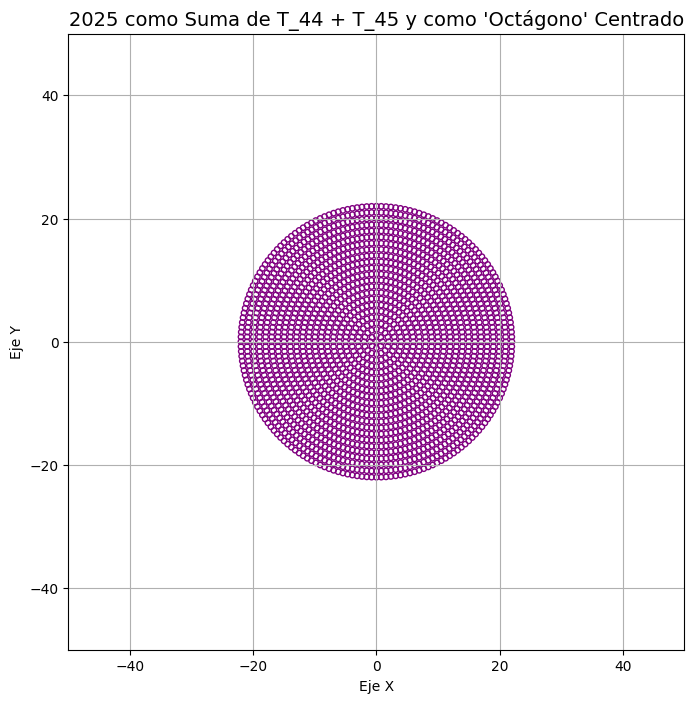

Archivo MP4 guardado en: 2025_anim.mp4
Archivo GIF guardado en: 2025_anim.gif


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

##############################################
# 1. FUNCIONES AUXILIARES
##############################################

def triangular_number(n):
    """
    Retorna el n-ésimo número triangular: n(n+1)/2
    """
    return n * (n + 1) // 2

def triangular_coordinates(n):
    """
    Genera la disposición (x, y) de n(n+1)/2 puntos en forma triangular.
    """
    coords = []
    count = 0
    total = triangular_number(n)
    for row in range(1, n + 1):
        for col in range(row):
            x = col - row/2
            y = -row
            coords.append((x, y))
            count += 1
            if count >= total:
                break
    return coords

def centered_octagon_coordinates(levels):
    """
    Genera 2025 puntos (cuando levels=23) para un 'octágono centrado' en anillos.
    La fórmula total es:
        1 + sum_{r=1..(levels-1)} 8*r
    Si levels=23, sum_{r=1..22} 8*r + 1 = 2025.
    """
    coords = [(0, 0)]  # Punto central
    for r in range(1, levels):
        num_points_ring = 8 * r
        for i in range(num_points_ring):
            angle = 2 * np.pi * i / num_points_ring
            x = r * np.cos(angle)
            y = r * np.sin(angle)
            coords.append((x, y))
    return coords

##############################################
# 2. CALCULAR PUNTOS (T_44 + T_45) Y OCTÁGONO
##############################################

# T_44 = 990 puntos, T_45 = 1035 puntos => total = 2025
coords_T44 = triangular_coordinates(44)
coords_T45 = triangular_coordinates(45)
coords_combined = coords_T44 + coords_T45  # 2025 puntos

# "Octágono centrado" para levels=23 => 2025 puntos
oct_coords = centered_octagon_coordinates(23)

# Verificamos que ambos tengan 2025 puntos
assert len(coords_combined) == 2025, "T_44 + T_45 no suman 2025?"
assert len(oct_coords) == 2025, "El octágono centrado no tiene 2025 puntos."
assert len(coords_combined) == len(oct_coords), "Deben coincidir en cantidad de puntos."

# Convertir a arreglos numpy para interpolar
coords_combined = np.array(coords_combined)
oct_coords = np.array(oct_coords)

##############################################
# 3. CONFIGURAR ANIMACIÓN
##############################################

total_points = len(coords_combined)  # 2025
frames_aparicion = 60  # frames para "aparecer" T_44 y T_45
frames_transform = 60  # frames para transformar a octágono
total_frames = frames_aparicion + frames_transform

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
ax.set_aspect('equal')
ax.set_title("2025 como Suma de T_44 + T_45 y como 'Octágono' Centrado", fontsize=14)
ax.set_xlabel("Eje X")
ax.set_ylabel("Eje Y")
ax.grid(True)

# Scatter inicial (vacío)
scatter = ax.scatter([], [], c=[], s=15)

##############################################
# 4. FUNCIÓN DE ACTUALIZACIÓN
##############################################

def update(frame):
    """
    - Fase A (0..frames_aparicion-1): Muestra puntos de T_44+T_45 progresivamente.
    - Fase B (frames_aparicion..total_frames-1): Interpola todos los puntos hacia oct_coords.
    """
    if frame < frames_aparicion:
        # Fase A: ir aumentando la cantidad de puntos
        fraction = frame / (frames_aparicion - 1)
        num_pts = int(fraction * total_points)

        visible_coords = coords_combined[:num_pts]
        # Colores: T_44 en azul, T_45 en verde
        colors = []
        for i in range(num_pts):
            if i < len(coords_T44):
                colors.append("blue")
            else:
                colors.append("green")

        scatter.set_offsets(visible_coords)
        scatter.set_color(colors)
        scatter.set_sizes([15]*num_pts)

    else:
        # Fase B: interpolar
        fraction = (frame - frames_aparicion) / (frames_transform - 1)  # 0..1
        current_positions = (1 - fraction) * coords_combined + fraction * oct_coords

        scatter.set_offsets(current_positions)
        scatter.set_color(["purple"] * total_points)
        scatter.set_sizes([15] * total_points)

    return (scatter,)

##############################################
# 5. CREAR LA ANIMACIÓN Y MOSTRARLA
##############################################

ani = FuncAnimation(fig, update, frames=total_frames, interval=150,
                    blit=False, repeat=True)

# MUESTRA LA ANIMACIÓN EN COLAB (IMPORTANTE: todo en la misma celda)
HTML(ani.to_jshtml())

plt.show()

##############################################
# 6. GUARDAR COMO MP4 / GIF (Opcional)
##############################################
# Requiere 'ffmpeg' y/o 'pillow' instalados en Colab.
# 1) MP4:
ani.save("2025_anim.mp4", writer='ffmpeg', fps=5)

# 2) GIF:
from matplotlib.animation import PillowWriter
ani.save("2025_anim.gif", writer=PillowWriter(fps=5))

# Para ver en Colab, por ejemplo, la GIF:
from IPython.display import Image
Image("2025_anim.gif")

# Paso 1: Guardar la animación como MP4 y GIF
from matplotlib.animation import PillowWriter
from google.colab import files

# Guardar MP4 (requiere ffmpeg instalado en Colab)
mp4_path = "2025_anim.mp4"
ani.save(mp4_path, writer='ffmpeg', fps=5)
print(f"Archivo MP4 guardado en: {mp4_path}")

# Guardar GIF (requiere pillow instalado)
gif_path = "2025_anim.gif"
writer_gif = PillowWriter(fps=5)
ani.save(gif_path, writer=writer_gif)
print(f"Archivo GIF guardado en: {gif_path}")

# Paso 2: Descargar los archivos
files.download(mp4_path)  # Descarga el MP4
files.download(gif_path)  # Descarga el GIF

